# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Siti Marwah
- **Email:** m228d4kx2569@bangkit.academy
- **ID Dicoding:** sitimarwah

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara waktu (jam/hari) dengan jumlah total sepeda yang dipinjam (cnt)?
- Apakah ada pola musiman dalam penggunaan sepeda berdasarkan bulan atau musim?
- Apakah cuaca (weathersit) berpengaruh terhadap jumlah sepeda yang dipinjam?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#memuat tabel hour
hour_df = pd.read_csv('/content/drive/MyDrive/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#memuat tabel day
day_df = pd.read_csv('/content/drive/MyDrive/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

####Nilai tabel hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####Nilai tabel day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

####Membersihkan tabel hour_df

##### Duplicate data

In [10]:
hour_df.drop_duplicates(inplace=True)

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [12]:
hour_df.dropna(inplace=True)

In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Fixed data type

In [14]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

####Membersihkan tabel day_df

##### Duplicate data

In [15]:
day_df.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [17]:
day_df.dropna(inplace=True)

In [18]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Fixed data type

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

### Combining Data

In [20]:
#menggabungkan data ke dalam satu data frame
merged_df = pd.merge(hour_df, day_df, on='dteday', how='inner')

## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik dari Data dengan Mengabaikan Kolom Non-Numerik

In [21]:
numeric_columns = merged_df.select_dtypes(include=['int', 'float']).columns
merged_df[numeric_columns].describe()

,instant_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualization & Explanatory Analysis

### Hubungan antara waktu (jam/hari) dengan jumlah total sepeda yang dipinjam (cnt)

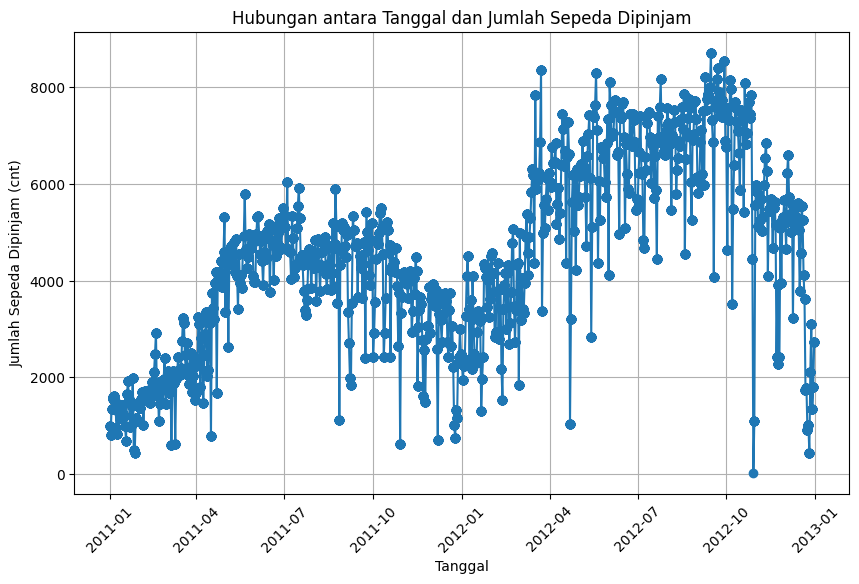

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['dteday'], merged_df['cnt_y'], marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda Dipinjam (cnt)')
plt.title('Hubungan antara Tanggal dan Jumlah Sepeda Dipinjam')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pola musiman dalam penggunaan sepeda berdasarkan bulan atau musim

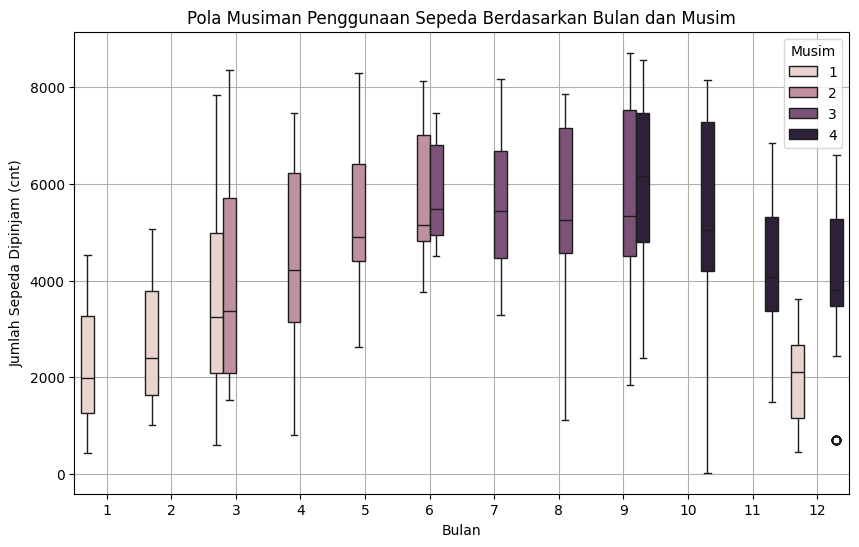

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='mnth_y', y='cnt_y', hue='season_y')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Dipinjam (cnt)')
plt.title('Pola Musiman Penggunaan Sepeda Berdasarkan Bulan dan Musim')
plt.legend(title='Musim')
plt.grid(True)
plt.show()

### Pengaruh cuaca (weathersit) terhadap jumlah sepeda yang dipinjam

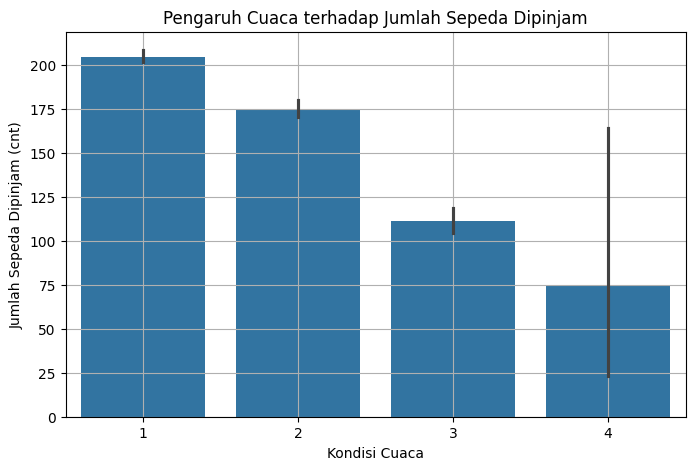

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='weathersit_x', y='cnt_x')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda Dipinjam (cnt)')
plt.title('Pengaruh Cuaca terhadap Jumlah Sepeda Dipinjam')
plt.grid(True)
plt.show()

## Conclusion

- Hubungan antara waktu (jam/hari) dengan jumlah total sepeda yang dipinjam (cnt) dapat dilihat pada grafik pertama yang menunjukkan bahwa terjadi peningkatan peminjaman sepeda pada awal tahun dengan rentang bulan 1 hingga bulan 7 untuk tiap tahunnya. Dan sebaliknya, saat mendekati akhir tahun, bulan 10 hingga bulan 1, maka jumlah sepeda yang dipinjam menurun. Jadi, semakin mendekati akhir tahun, semakin rendah jumlah sepeda yang dipinjam.

- Pola yang ada dalam penggunaan sepeda berdasarkan bulan dan musim dapat dilihat pada diagram kotak garis yang menunjukkan pola penggunaan sepeda berdasarkan bulan dan musim. Pada sumbu horizontal disajikan bulan dalam setahun dan pada sumbu vertikal ditunjukkan jumlah penggunaan sepeda. Dari graf tersebut, kita dapat melihat perbandingan jumlah penggunaan sepeda berdasarkan bulan dan musim tertentu. Jumlah penggunaan sepada meningkat dari bulan 1 hingga bulan 6 yang melewati 2 musim yaitu musim semi(1), dan musim panas(2). Pada bulan 7-9 dengan musim gugur(3) tidak terjadi perubahan signifikan atau tetap konstan hingga menuju akhir tahun terjadi penurunan. Hal ini sangat mungkin disebabkan oleh faktaa bahwa pada akhir tahun merupakan musim dingin(4) yang mengakibatkan pengguna tidak melakukan kegiatan bersepeda.

- Pengaruh cuaca (weathersit) terhadap jumlah sepeda yang dipinjam dapat dilihat dalam diagram batang yang menunjukkan hubungan antara keduanya, Pada diagram batang dapat dilihat dengan jelas bahwa semakin cerah cuaca maka semakin banyak jumlah sepeda yang dipinjam, dan sebaliknya. Dengan keterangan weathersit Cerah(1),
Kabut dan Berawan(2),Salju/hujan Ringan(3), Hujan Lebat(4).

In [30]:
merged_df.to_csv("all_data.csv", index=False)